## Importing Dependencies:

In [1]:
# Importing dependencies
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import adversarial-robustness-toolbox as art

from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset


# Increasing Matplotlib font size
matplotlib.rcParams.update({"font.size": 14})

c:\Users\souma\anaconda3\envs\ai_security\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\souma\anaconda3\envs\ai_security\Lib\site-packages\art\estimators\certification\__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


## Loading Data:

In [7]:
# Loading the data
(train_images, train_labels), (test_images, test_labels), min, max = load_dataset(name="mnist")

## Training the Model (TensorFlow Keras Model):

In [4]:
# Function for creating model
def create_model():
    # Defining the model
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),        
        Dense(units=10, activation="softmax")
    ])

    # Compiling the model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )

    # Returning the model
    return model

In [5]:
# Instantiating the model
model = create_model()

# Training the model
model.fit(
    x=train_images, 
    y=train_labels, 
    epochs=10,
    batch_size=256)

c:\Users\souma\anaconda3\envs\ai_security\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.7991 - loss: 0.7998
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9705 - loss: 0.0983
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9804 - loss: 0.0623
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9847 - loss: 0.0505
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9866 - loss: 0.0439
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9884 - loss: 0.0402
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9890 - loss: 0.0337
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.9910 - loss: 0.0294
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9918 - loss: 0.0260
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9919 - loss: 0.0257


In [6]:
model

<Sequential name=sequential, built=True>

In [7]:
# save model and its architecture 
model.save('D:/Soumadeep_Macbook/Cybersecurity and Artificial Intelligence Macbook/Advance_NLP_Generative_AI/LLM_Security/WORKSPACE/CODE/Model/target_tf_keras_minst_model.h5')

## Load the Trained Model -> User Input:

In [2]:
model = tf.keras.models.load_model('D:/Soumadeep_Macbook/Cybersecurity_and_Artificial_Intelligence_Macbook/Advance_NLP_Generative_AI/LLM_Security/WORKSPACE/CODE\Model/target_tf_keras_minst_model.h5')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\souma\AppData\Local\Temp\ipykernel_25248\1953670912.py:1: SyntaxWarning: invalid escape sequence '\M'
  model = tf.keras.models.load_model('D:/Soumadeep_Macbook/Cybersecurity_and_Artificial_Intelligence_Macbook/Advance_NLP_Generative_AI/LLM_Security/WORKSPACE/CODE\Model/target_tf_keras_minst_model.h5')


In [3]:
model

<Sequential name=sequential, built=True>

## Defining an Evasion Attack on our Model:

In [4]:
# Creating a classifier by wrapping our TF model in ART's KerasClassifier class
# create ART classifier object
loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(clip_values=(0, 1), model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=loss_object,)

In [5]:
# Defining an Evasion Attack using the Fast Gradient Method
attack_fgsm = FastGradientMethod(
    estimator=classifier, 
    eps=0.3
    )

In [8]:
# Generating adversarial images from test images
test_images_adv = attack_fgsm.generate(x=test_images)

## Evaluating the effectiveness of the Attack:

ORIGINAL IMAGE


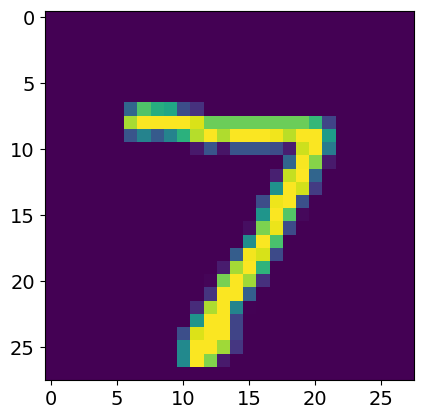

In [9]:
print('ORIGINAL IMAGE')
plt.imshow(test_images[0].squeeze())

ADVERSARIAL IMAGE


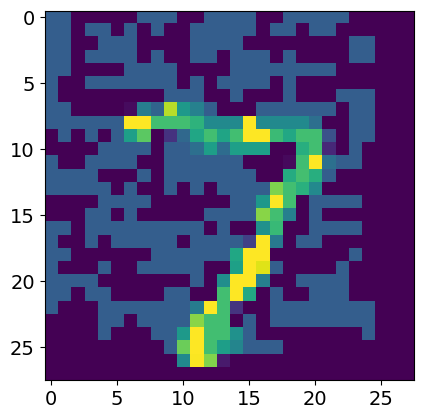

In [10]:
# Viewing an adversarial image
print('ADVERSARIAL IMAGE')
plt.imshow(test_images_adv[0].squeeze())

In [11]:
# Evaluating the model on clean images
score_clean = model.evaluate(
    x=test_images, 
    y=test_labels
    )

# Evaluating the model on adversarial images
score_adv = model.evaluate(
    x=test_images_adv, 
    y=test_labels
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0417
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0557 - loss: 7.0141
Clean test set loss: 0.03 vs adversarial set test loss: 6.81
Clean test set accuracy: 0.99 vs adversarial test set accuracy: 0.06


## Different Epsilon Values:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9758 - loss: 0.0591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9464 - loss: 0.1364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8904 - loss: 0.3025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7933 - loss: 0.5939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6638 - loss: 1.0499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5042 - loss: 1.6866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3442 - loss: 2.4861
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2118 - loss: 3.3969
1/1 ━━━━━━━━━━━━━━━━━

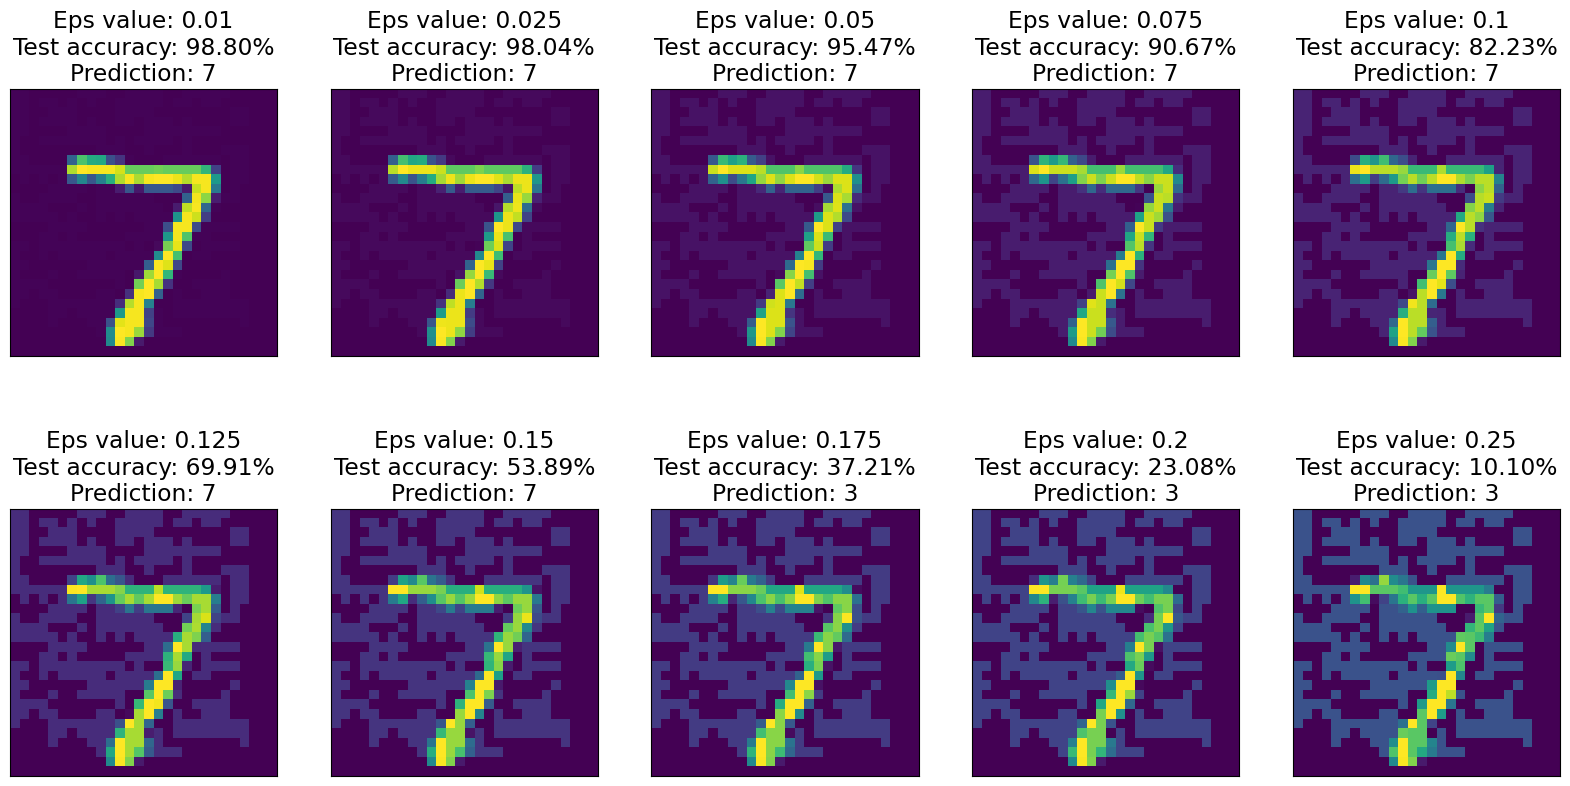

In [12]:
# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = FastGradientMethod(
            estimator=classifier, 
            eps=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=test_images)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0].squeeze())

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = classifier._model.evaluate(
            x=test_images_adv, 
            y=test_labels
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()

#### Epsilon values are used to control the amount of perturbation added to the original image.

#### A smaller epsilon value means less perturbation, while a larger epsilon value means more perturbation

#### The choice of epsilon value can significantly affect the model's performance on adversarial examples. A smaller epsilon may lead to less noticeable perturbations, while a larger epsilon can result in more aggressive attacks that may degrade the model's accuracy more severely.

#### In practice, the choice of epsilon should be based on the specific use case and the desired balance between robustness and performance. It is often determined through experimentation and validation on a separate dataset.

## Epsilon Value of 0.175 was good enough to misclassify the image to 3 from 7.